In [1]:

# Vamos então trabalhar com um exemplo clássico para entendermos melhor o conceito na prática!
# Vamos importar o dataset iris
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# A seguir, iremos separar todas as colunas na lista de ‘recursos’ para uma variável ‘X’ e a variável ‘destino’ para ‘y’.
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features].values
y = df['Target'].values

In [11]:
from sklearn.preprocessing import StandardScaler
# Normalizando os dados utilizando o standardScaler
# (Padroniza as features removendo a média e escala a variância a uma unidade.
# Isso significa que para cada feature, a média seria 0, e o Desvio Padrão seria 1)
X = StandardScaler().fit_transform(X)
#Visualizando nossos dados padronizados
df_padronizado = pd.DataFrame(data=X, columns=features)
df_padronizado.head()
     

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [13]:
# importando PCA da biblioteca sklearn
from sklearn.decomposition import PCA
# Instanciando o pca e a quantidade de componentes que desejamos obter
pca = PCA(n_components=2)
# Aplicando PCA nas nossas features
principalComponents = pca.fit_transform(X)

# Criando um novo dataframe para visualizarmos como ficou nossos dados reduzidos com o PCA
df_pca = pd.DataFrame(data = principalComponents,
                  columns = ['PC1', 'PC2'])

target = pd.Series(iris['target'], name='target')
result_df = pd.concat([df_pca, target], axis=1)
result_df

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [15]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\nTotal Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.72962445 0.22850762]

Total Variance Explained: 95.81


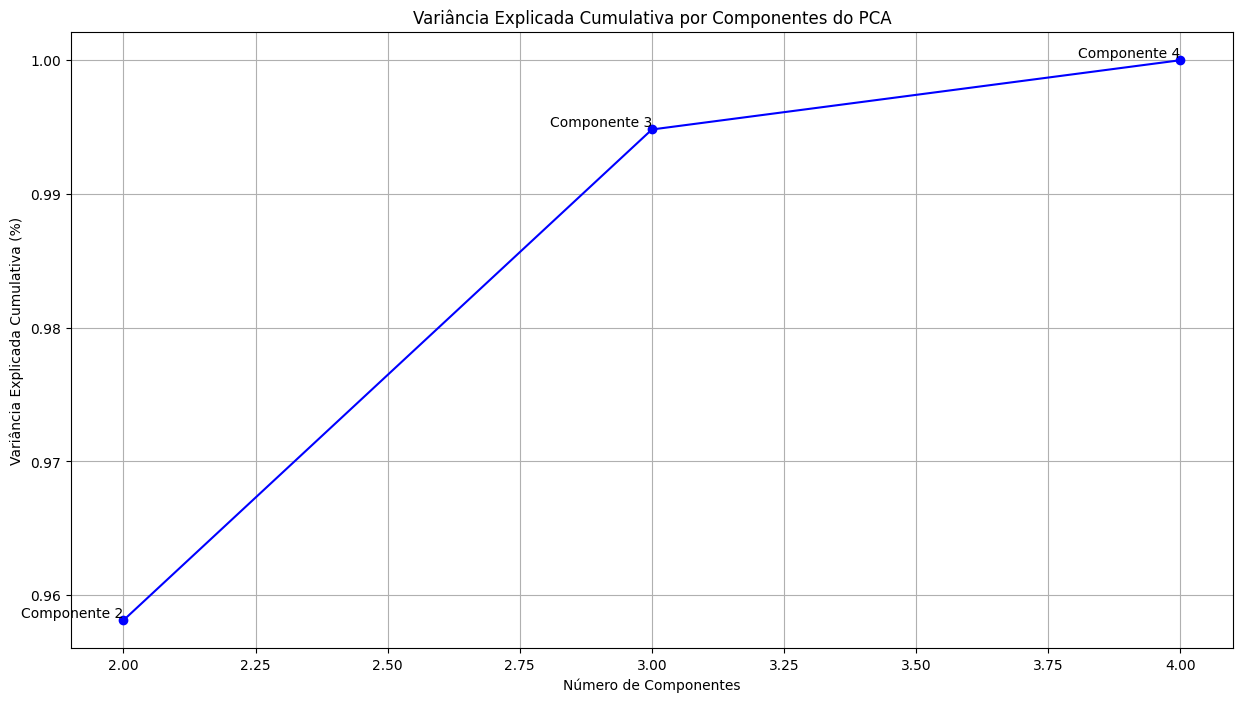

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crie uma lista para armazenar os resultados
results = []
# Dados de exemplo (substitua pelo seu conjunto de dados X)
X = df_padronizado
# Faça um loop de 2 a 4 componentes
for n in range(2, 5):
    # Crie o objeto PCA
    pca = PCA(n_components=n)
    # Ajuste o PCA aos seus dados
    pca.fit(X)
    # Calcule a variância explicada cumulativa e adicione aos resultados
    explained_variance = np.sum(pca.explained_variance_ratio_)
    results.append(explained_variance)
# Crie o gráfico
plt.figure(figsize=(15, 8))
plt.plot(range(2, 5), results, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa (%)')
plt.title('Variância Explicada Cumulativa por Componentes do PCA')
plt.grid(True)
# Adicione rótulos aos pontos de dados
for i, (n_components, explained_var) in enumerate(zip(range(2, 5), results)):
    plt.text(n_components, explained_var, f'Componente {n_components}', ha='right', va='bottom')
plt.show()